# COMS 4770 - HW8 - Hedgren

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 2. (20 pts)

Use steepest descent and ascent to find the local minima and maxima of the function

$$ f(x_1, x_2) = \frac{x^3_1}{3}+x^2_2x_1-3x_1 $$

correct to $10^{-6}$. Please describe your algorithm.

In [44]:
def f(x1, x2):
    return (x1 ** 3) / 3 + x2 ** 2 * x1 - 3 * x1

def gradient(x1, x2):
    df_dx1 = x1 ** 2 + x2 ** 2 - 3
    df_dx2 = 2 * x2 * x1
    return np.array([df_dx1, df_dx2])

def steepest_descent_ascent(starting_point, learning_rate=0.01, tolerance=1e-6, max_iters=10000):
    x_min = np.array(starting_point, dtype=float)
    for _ in range(max_iters):
        grad = gradient(x_min[0], x_min[1])
        if np.linalg.norm(grad) < tolerance:
            break
        x_min = x_min - learning_rate * grad
    
    x_max = np.array(starting_point, dtype=float)
    for _ in range(max_iters):
        grad = gradient(x_max[0], x_max[1])
        if np.linalg.norm(grad) < tolerance:
            break
        x_max = x_max + learning_rate * grad
        

    return x_min, f(x_min[0], x_min[1]), x_max, f(x_max[0], x_max[1])

starting_point = [2, 1]

x_min, f_min, x_max, f_max = steepest_descent_ascent(starting_point)

print("Local minimum point:", x_min)
print("Function value at minimum:", f_min)
print("Local maximum point:", x_max)
print("Function value at maximum:", f_max)

Local minimum point: [1.73205080e+00 2.88290467e-07]
Function value at minimum: -3.4641016151376105
Local maximum point: [inf inf]
Function value at maximum: nan


/tmp/ipykernel_19228/3921894679.py:5: RuntimeWarning: overflow encountered in scalar power
  df_dx1 = x1 ** 2 + x2 ** 2 - 3
/tmp/ipykernel_19228/3921894679.py:6: RuntimeWarning: overflow encountered in scalar multiply
  df_dx2 = 2 * x2 * x1
/tmp/ipykernel_19228/3921894679.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return (x1 ** 3) / 3 + x2 ** 2 * x1 - 3 * x1


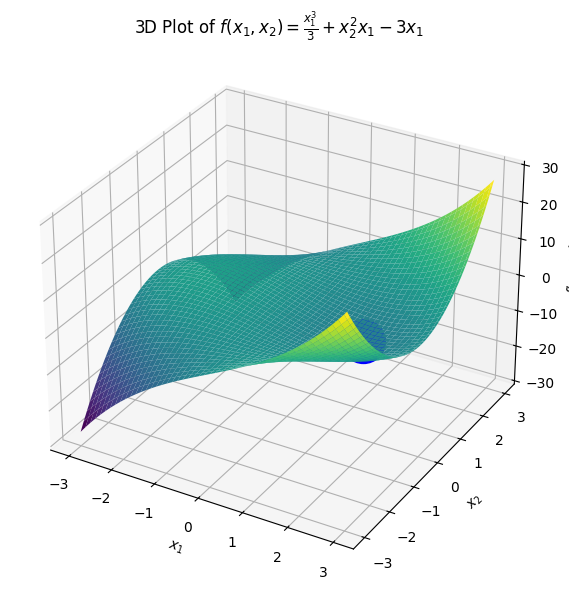

In [45]:
from mpl_toolkits.mplot3d import Axes3D

x1_vals = np.linspace(-3, 3, 100)
x2_vals = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

f_vals = (x1 ** 3) / 3 + x2 ** 2 * x1 - 3 * x1

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, f_vals, cmap='viridis', edgecolor='none')
ax.scatter(x_min[0], x_min[1], f_min, color='b', s=1000)
ax.scatter(x_max[0], x_max[1], f_max, color='r', s=1000)
ax.set_title("3D Plot of $f(x_1, x_2) = \\frac{x_1^3}{3} + x_2^2 x_1 - 3 x_1$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1, x_2)$")
plt.show()

### Algorithm explanation

This algorithm uses a classic optimization technique in Machine Learning known as gradient descent (and gradient ascent). It works by taking the partial derivatives and moving downward (for descent) or upward (for ascent). It does so by taking the partial derivates for each parameters then multiplying it by the learning rate then adding the product to the current parameter values for a new parameter value. It keeps doing then until the partial derivative have reached it's tolerance. This is means that it has reached a nearly flat area in the function. Since it is either constantly ascending or descending when it stops it can be assume that is the local max or min.

This function is sensitive because 2 corners go infinetly down and the other 2 go infinitely up. So for the local min and maxs that I found, using the initial starting point [2, 1], the local max is infinite and the local max is finite.

### Outputs:

Local minimum point: [1.73205080e+00 2.88290467e-07]

Function value at minimum: -3.4641016151376105

Local maximum point: [inf inf]

Function value at maximum: nan

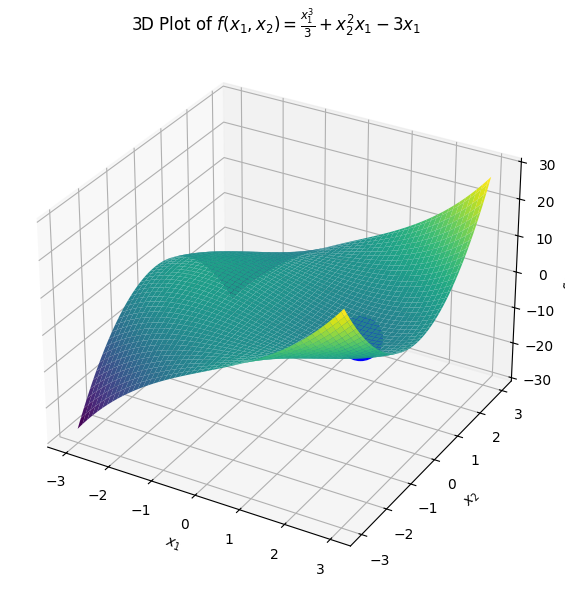

## 3. (20 pts)

Construct a line ℓ that best fits the following 10 points in the least-squares sense:

(0, 0.905877) (1, 1.21214) (2, 0.744417) (3, −0.099021) (4, −0.268071)
(5, −1.035455) (6, −1.28139) (7, −1.36631) (8, −1.80558) (9, −2.13389)

Implement the line fitting algorithm from Section 3 of the notes titled “Data Fitting”.

In [6]:
points = np.array([
    [0, 0.905877], [1, 1.21214], [2, 0.744417], [3, -0.099021], [4, -0.268071],
    [5, -1.035455], [6, -1.28139], [7, -1.36631], [8, -1.80558], [9, -2.13389]
])

# Calculate the centroid of the points
centroid = np.mean(points, axis=0)

# Form the matrix M with points shifted by the centroid
M = points - centroid

# Compute the covariance matrix M * M^T
cov_matrix = M.T @ M

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# The eigenvector associated with the smallest eigenvalue gives the direction (a, b)
min_eigenvalue_index = np.argmin(eigenvalues)
direction = eigenvectors[:, min_eigenvalue_index]
a, b = direction

# Calculate d using the centroid
d = a * centroid[0] + b * centroid[1]

print("Best-fitting line parameters:")
print(f"a = {a}")
print(f"b = {b}")
print(f"d = {d}")


Best-fitting line parameters:
a = 0.36018541932354814
b = 0.9328807339133549
d = 1.14252003415382


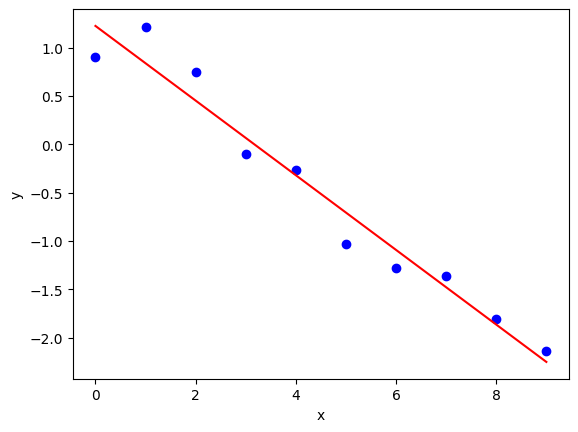

In [11]:
x_vals = np.linspace(0, 9, 100)
y_vals = (d - a * x_vals) / b 

plt.scatter(points[:, 0], points[:, 1], color='blue')
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Describe how the result is obtained.

Find the centroid, which is found by taking the mean of all the points. Minimize $(a,b)MM^T(a,b)^T$, where M is the the distances of the points from the centroid. This can be done by finding the smallest eigenvalue of $MM^T$, then its corresponding eigenvector is the direction of the line, the (a, b), of the line. We then find the d, or the distance from the origin of the line, by subtracting the centroid from (a, b). In the end we have the best fitting line in the form of 

$$ax+by=d$$
$$0.36018541932354814 x + 0.9328807339133549 y = 1.14252003415382$$

### Outputs:
Best-fitting line parameters:
$$a = 0.36018541932354814$$
$$b = 0.9328807339133549$$
$$d = 1.14252003415382$$


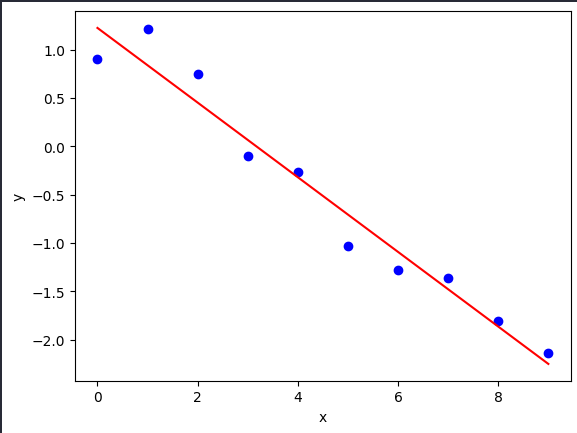